In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, KFold

# from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')


<Figure size 1000x500 with 0 Axes>

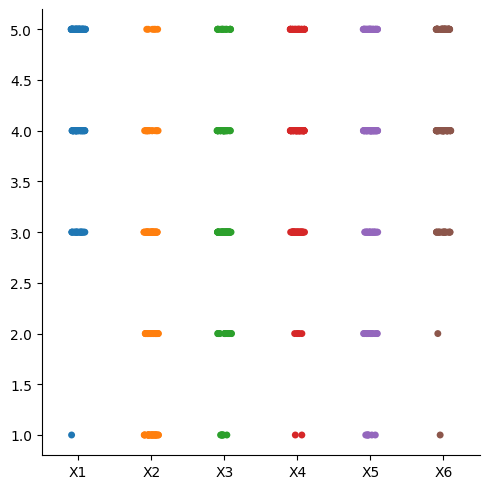

In [2]:
reader = pd.read_csv("ACME-HappinessSurvey2020.csv")

print(reader.columns)
# data as X, Target as Y

# dropping column Y as it's the target and assigning Data as X
X = reader.drop(columns=['Y'])
y = reader['Y']  # assiging target as Y

Fig1 = plt.figure(figsize=(10,5))
ax = sns.catplot(data= X) #x=X_test,y=y_test)
plt.show()

<Figure size 1000x500 with 0 Axes>

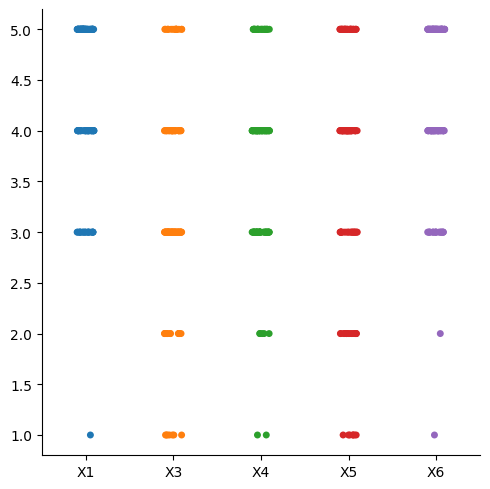

In [3]:
X = reader.drop(columns=['Y','X2'])
Fig1 = plt.figure(figsize=(10,5))
ax = sns.catplot(data= X) #x=X_test,y=y_test)
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [4]:
X_train, y_train

(     X1  X3  X4  X5  X6
 68    5   5   5   5   5
 12    5   4   5   5   5
 110   5   3   4   4   5
 124   4   3   4   4   5
 27    3   1   3   3   4
 ..   ..  ..  ..  ..  ..
 106   5   5   3   5   5
 14    4   3   3   4   3
 92    5   5   5   5   4
 51    5   3   3   4   4
 102   5   3   3   3   5
 
 [100 rows x 5 columns],
 68     1
 12     1
 110    0
 124    0
 27     1
       ..
 106    1
 14     0
 92     1
 51     1
 102    0
 Name: Y, Length: 100, dtype: int64)

In [5]:
regmodel = DecisionTreeClassifier(max_depth=6, random_state=42) 
regmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

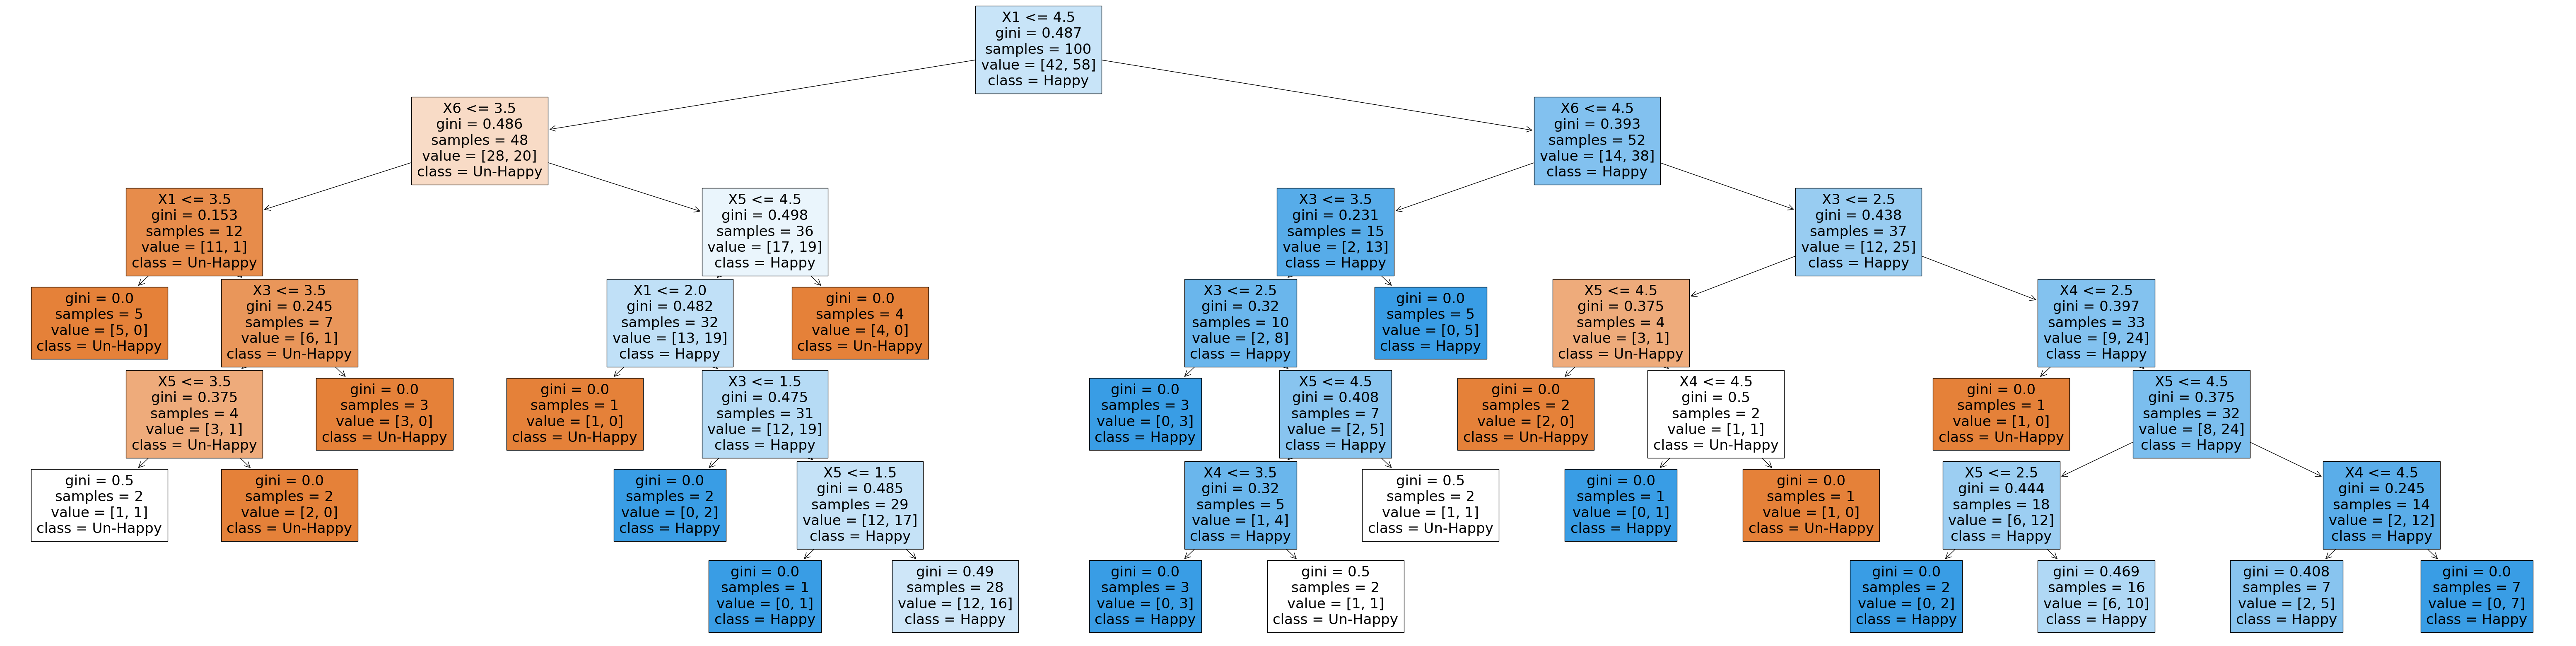

In [6]:
plt.figure(figsize =(80,20))
_ = tree.plot_tree(regmodel,
                   feature_names=X.columns,
                   class_names=['Un-Happy', "Happy"],
                   filled=True)

In [7]:
y_train_pred = regmodel.predict(X_train)
y_test_pred = regmodel.predict(X_test)

In [8]:
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
print('Train Confusion Matrix',confusion_matrix(y_train, y_train_pred))

print('Test Accuracy',accuracy_score(y_test, y_test_pred))
print('Test Confusion Matrix',confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.77
Train Confusion Matrix [[22 20]
 [ 3 55]]
Test Accuracy 0.5
Test Confusion Matrix [[ 4 11]
 [ 2  9]]


In [9]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Un-happy', "Happy"],
                       filled=True)

In [10]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train))*100,'%')
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test))*100,'%')
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [11]:
dt_depth = DecisionTreeClassifier(max_depth=10)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

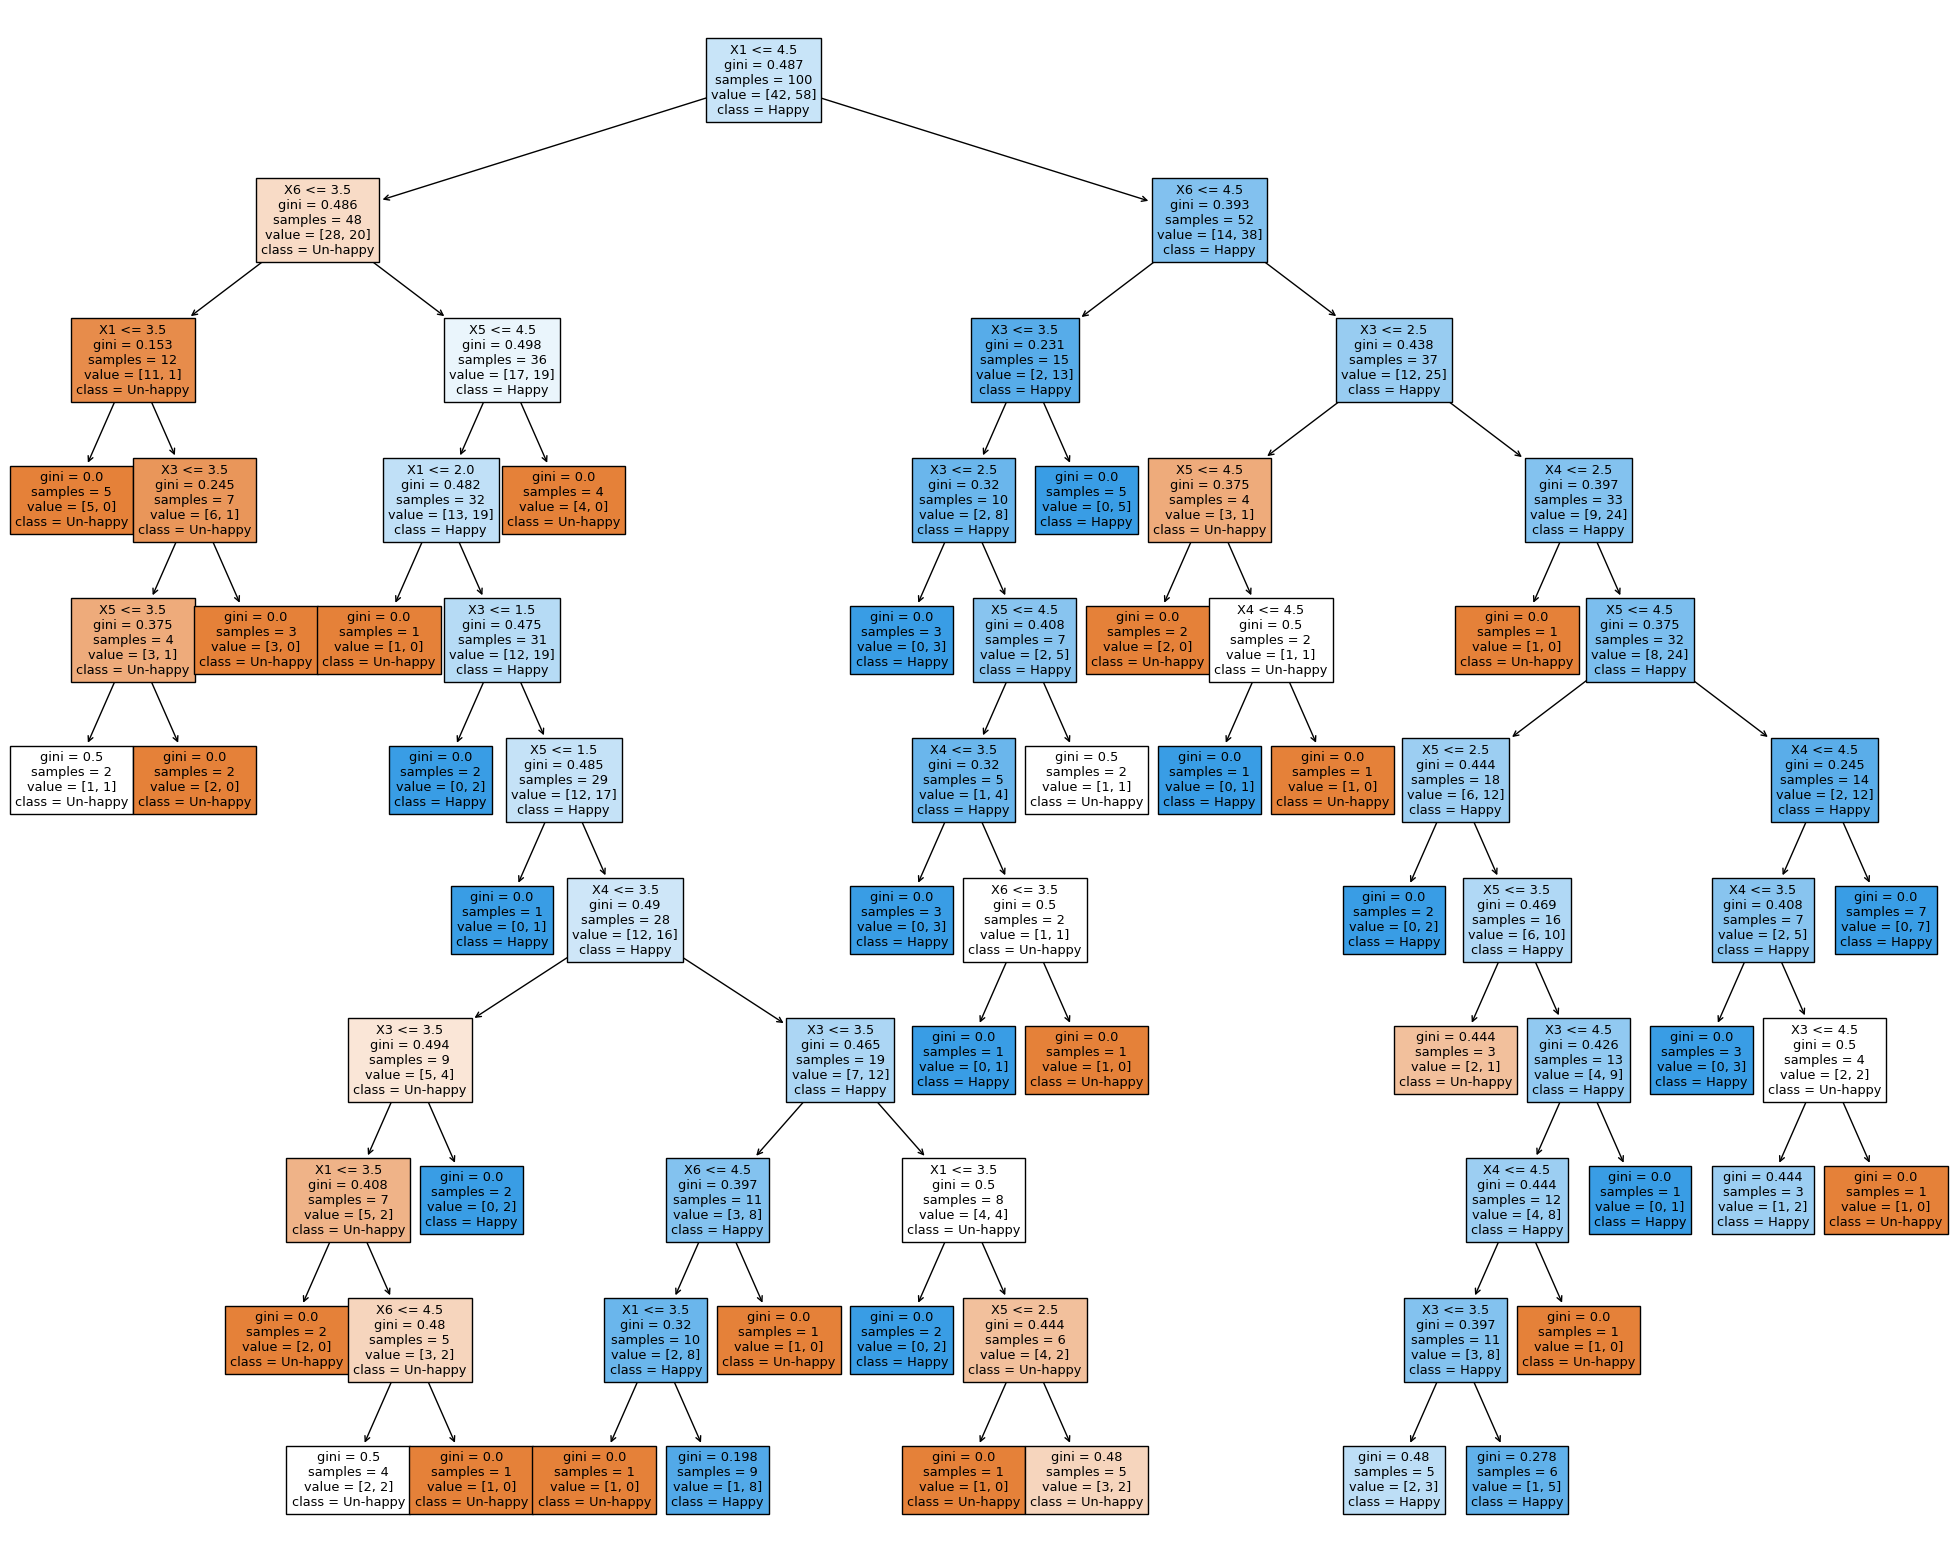

In [12]:
gph = get_dt_graph(dt_depth) 

In [13]:
evaluate_model(dt_depth)

Train Accuracy : 88.0 %
Train Confusion Matrix:
[[37  5]
 [ 7 51]]
--------------------------------------------------
Test Accuracy : 69.23076923076923 %
Test Confusion Matrix:
[[10  5]
 [ 3  8]]


In [14]:
dt_min_leaf_entropy = DecisionTreeClassifier(max_depth=10, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

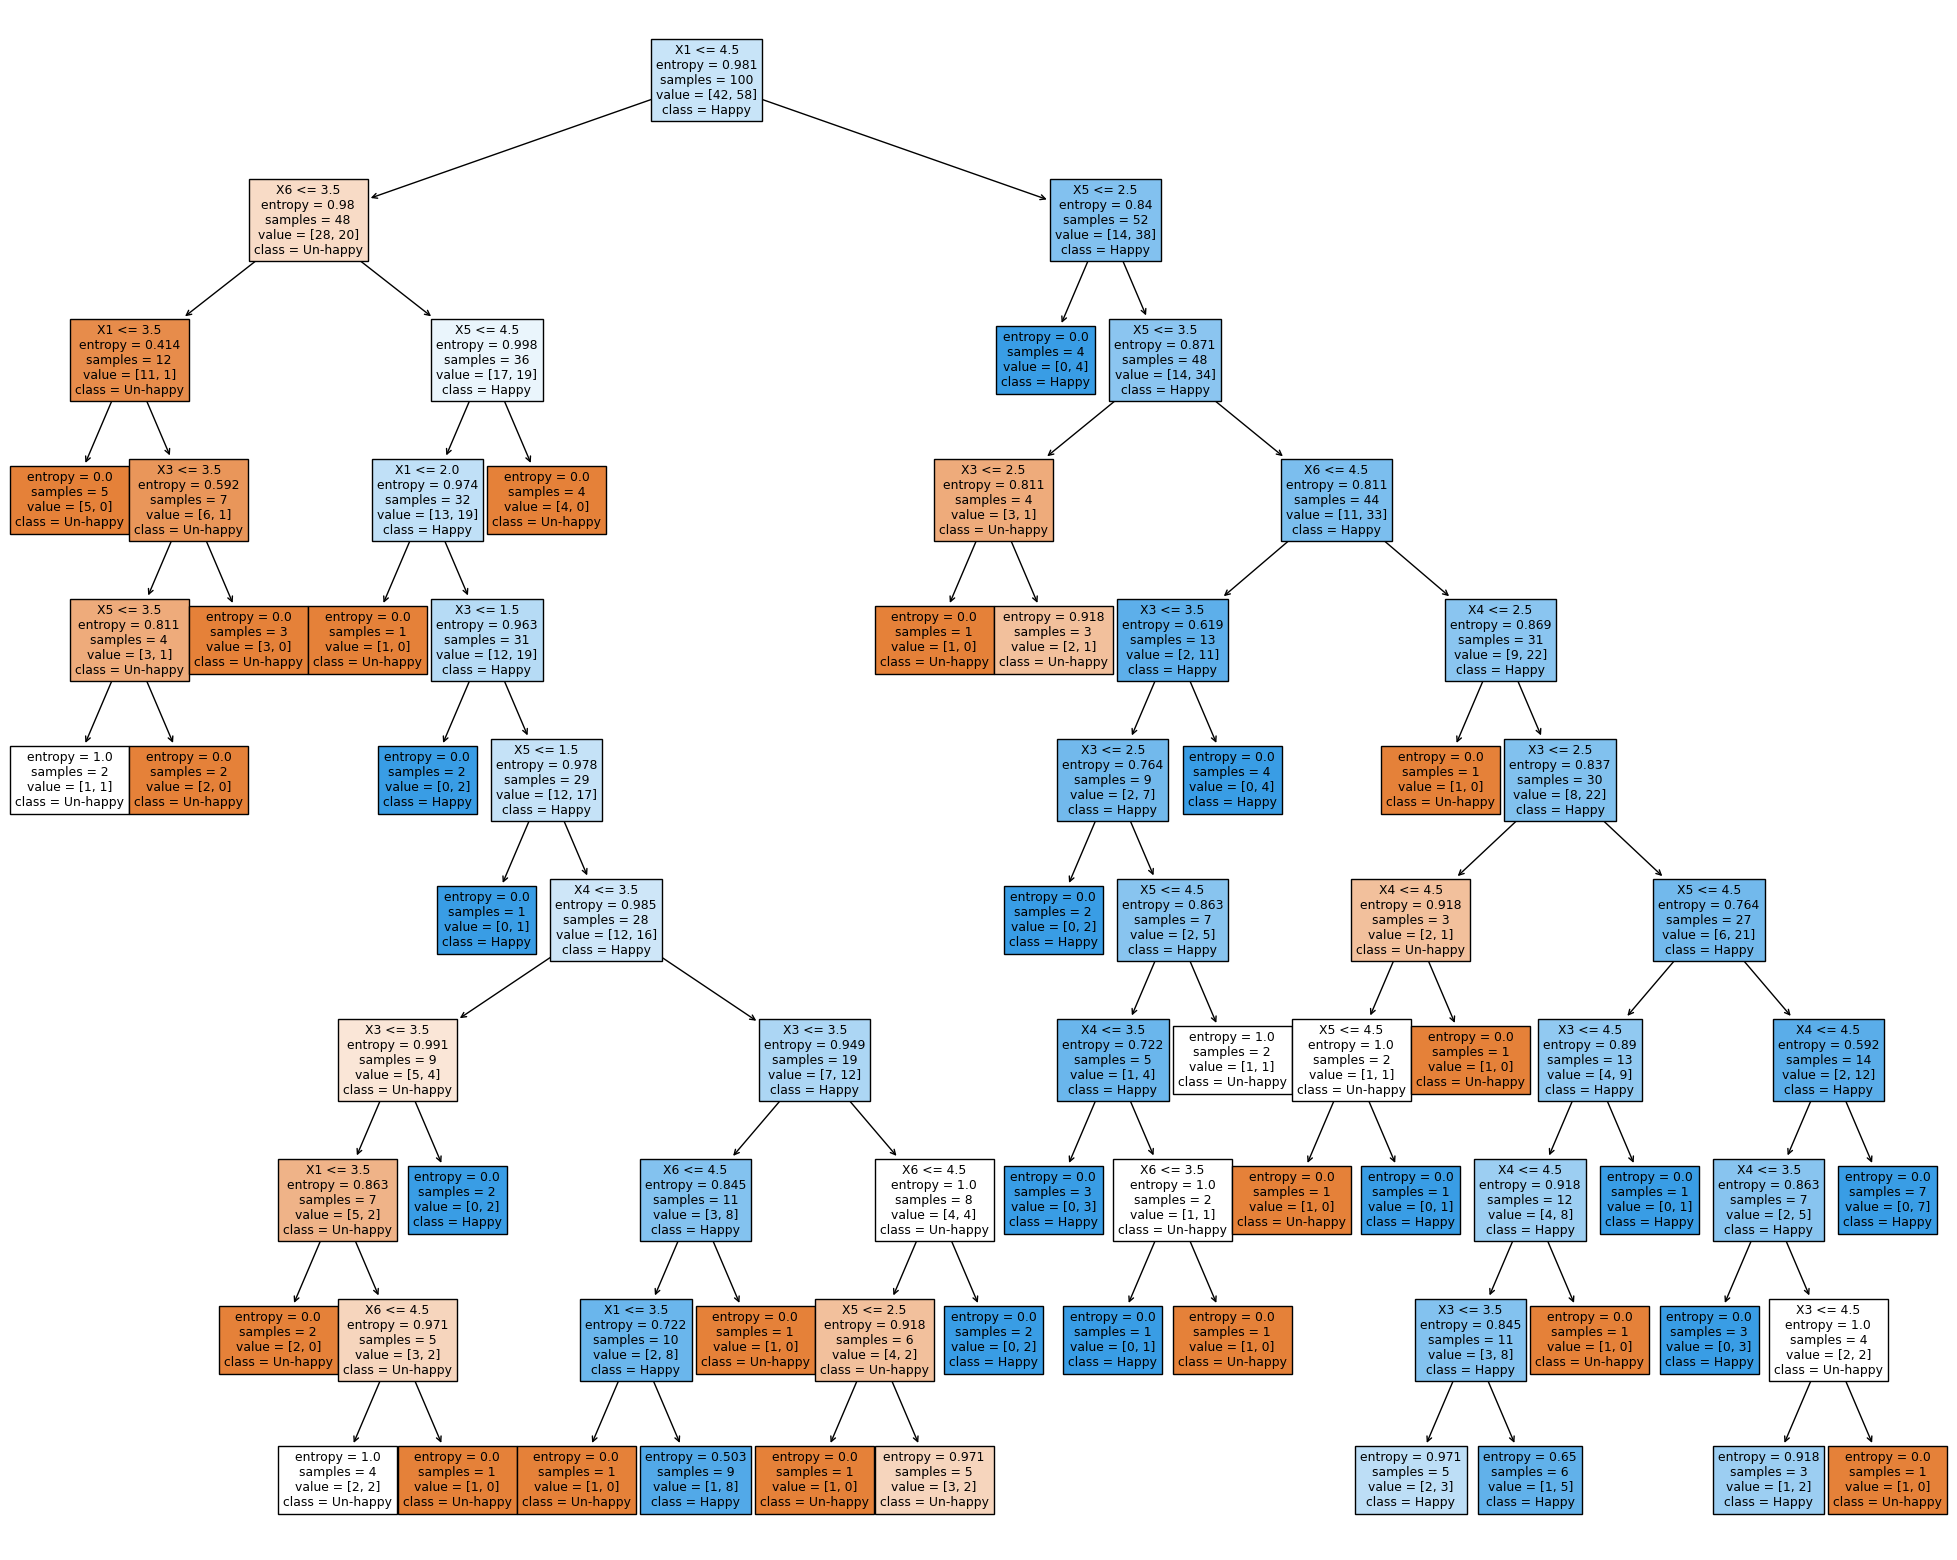

In [15]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [16]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 88.0 %
Train Confusion Matrix:
[[37  5]
 [ 7 51]]
--------------------------------------------------
Test Accuracy : 73.07692307692307 %
Test Confusion Matrix:
[[11  4]
 [ 3  8]]
